In [72]:
import pandas as pd

df = pd.read_csv('dirty_cafe_sales.csv')

In [73]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [74]:
#inspecting the datatypes in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [75]:
#missing values

df.isna().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


In [76]:
#dropping null values

df.dropna(inplace=True)

In [77]:
#inspecting for null type values in each column and removing them

df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'UNKNOWN', 'Sandwich',
       'Juice', 'Smoothie', 'ERROR', 'Tea'], dtype=object)

In [78]:
df.drop(df.loc[df['Item'].isin(['UNKNOWN','ERROR'])].index, axis = 0, inplace = True)

In [79]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR'],
      dtype=object)

In [80]:
df.drop(df.loc[df['Payment Method'].isin(['UNKNOWN','ERROR'])].index, axis = 0, inplace = True)

In [81]:
df['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', 'ERROR'], dtype=object)

In [82]:
df.drop(df.loc[df['Location'].isin(['UNKNOWN','ERROR'])].index, axis = 0, inplace = True)

In [83]:
#checking numerical rows for 'unknown' and error'

df[df['Quantity'].isin(['UNKNOWN','ERROR]'])]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
57,TXN_2080895,Cake,UNKNOWN,3.0,3.0,Digital Wallet,In-store,2023-04-19
278,TXN_3229409,Juice,UNKNOWN,3.0,UNKNOWN,Cash,Takeaway,2023-04-15
327,TXN_1259671,Sandwich,UNKNOWN,4.0,12.0,Digital Wallet,In-store,2023-10-08
438,TXN_3871837,Tea,UNKNOWN,1.5,4.5,Digital Wallet,Takeaway,2023-12-15
507,TXN_5427506,Cake,UNKNOWN,3.0,9.0,Cash,Takeaway,2023-09-15
743,TXN_1090854,Cookie,UNKNOWN,1.0,3.0,Credit Card,In-store,2023-01-07
848,TXN_4479052,Salad,UNKNOWN,5.0,20.0,Digital Wallet,In-store,2023-12-05
893,TXN_3110343,Tea,UNKNOWN,1.5,7.5,Digital Wallet,Takeaway,2023-06-24
974,TXN_4874685,Smoothie,UNKNOWN,4.0,4.0,Credit Card,In-store,UNKNOWN
1056,TXN_4907812,Sandwich,UNKNOWN,4.0,8.0,Digital Wallet,In-store,2023-08-11


In [84]:
df.drop(df.loc[df['Quantity'].isin(['UNKNOWN','ERROR'])].index, axis = 0, inplace = True)
df.drop(df.loc[df['Total Spent'].isin(['UNKNOWN','ERROR'])].index, axis = 0, inplace = True)
df.drop(df.loc[df['Price Per Unit'].isin(['UNKNOWN','ERROR'])].index, axis = 0, inplace = True)


In [85]:
df.drop(df.loc[df['Transaction Date'].isin(['UNKNOWN','ERROR'])].index, axis = 0, inplace = True)

In [86]:
#converting numeric columns to numeric data type

df[['Quantity', 'Price Per Unit', 'Total Spent']] = df[['Quantity', 'Price Per Unit', 'Total Spent']].apply(pd.to_numeric)

In [88]:
df['Transaction Date'] = pd.to_datetime(
    df['Transaction Date'],
    format='%Y-%m-%d',
    #errors = 'coerce'
)

In [89]:
import datetime

df['Transaction Date'] = df['Transaction Date'].dt.strftime('%Y-%m')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3089 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    3089 non-null   object 
 1   Item              3089 non-null   object 
 2   Quantity          3089 non-null   int64  
 3   Price Per Unit    3089 non-null   float64
 4   Total Spent       3089 non-null   float64
 5   Payment Method    3089 non-null   object 
 6   Location          3089 non-null   object 
 7   Transaction Date  3089 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 217.2+ KB


In [95]:
df.sort_values(by='Transaction Date', inplace=True)

In [96]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8311,TXN_9693344,Tea,4,1.5,6.0,Credit Card,Takeaway,2023-01
7476,TXN_8952145,Cake,3,3.0,9.0,Credit Card,Takeaway,2023-01
5253,TXN_8872997,Sandwich,4,4.0,16.0,Credit Card,In-store,2023-01
7459,TXN_6716151,Sandwich,3,4.0,12.0,Digital Wallet,Takeaway,2023-01
8984,TXN_7908153,Cookie,3,1.0,3.0,Cash,In-store,2023-01
...,...,...,...,...,...,...,...,...
1334,TXN_6555617,Salad,2,5.0,10.0,Digital Wallet,Takeaway,2023-12
7576,TXN_3509609,Smoothie,3,4.0,12.0,Digital Wallet,Takeaway,2023-12
4936,TXN_7733300,Smoothie,2,4.0,8.0,Cash,Takeaway,2023-12
1286,TXN_1389258,Salad,1,5.0,5.0,Cash,Takeaway,2023-12


In [97]:
df['Item'].value_counts()


,count
Item,
Juice,427
Salad,418
Cookie,391
Sandwich,391
Cake,385
Tea,372
Coffee,367
Smoothie,338


([<matplotlib.axis.YTick at 0x7da828e4e9d0>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25'),
  Text(0, 30, '30'),
  Text(0, 35, '35'),
  Text(0, 40, '40'),
  Text(0, 45, '45')])

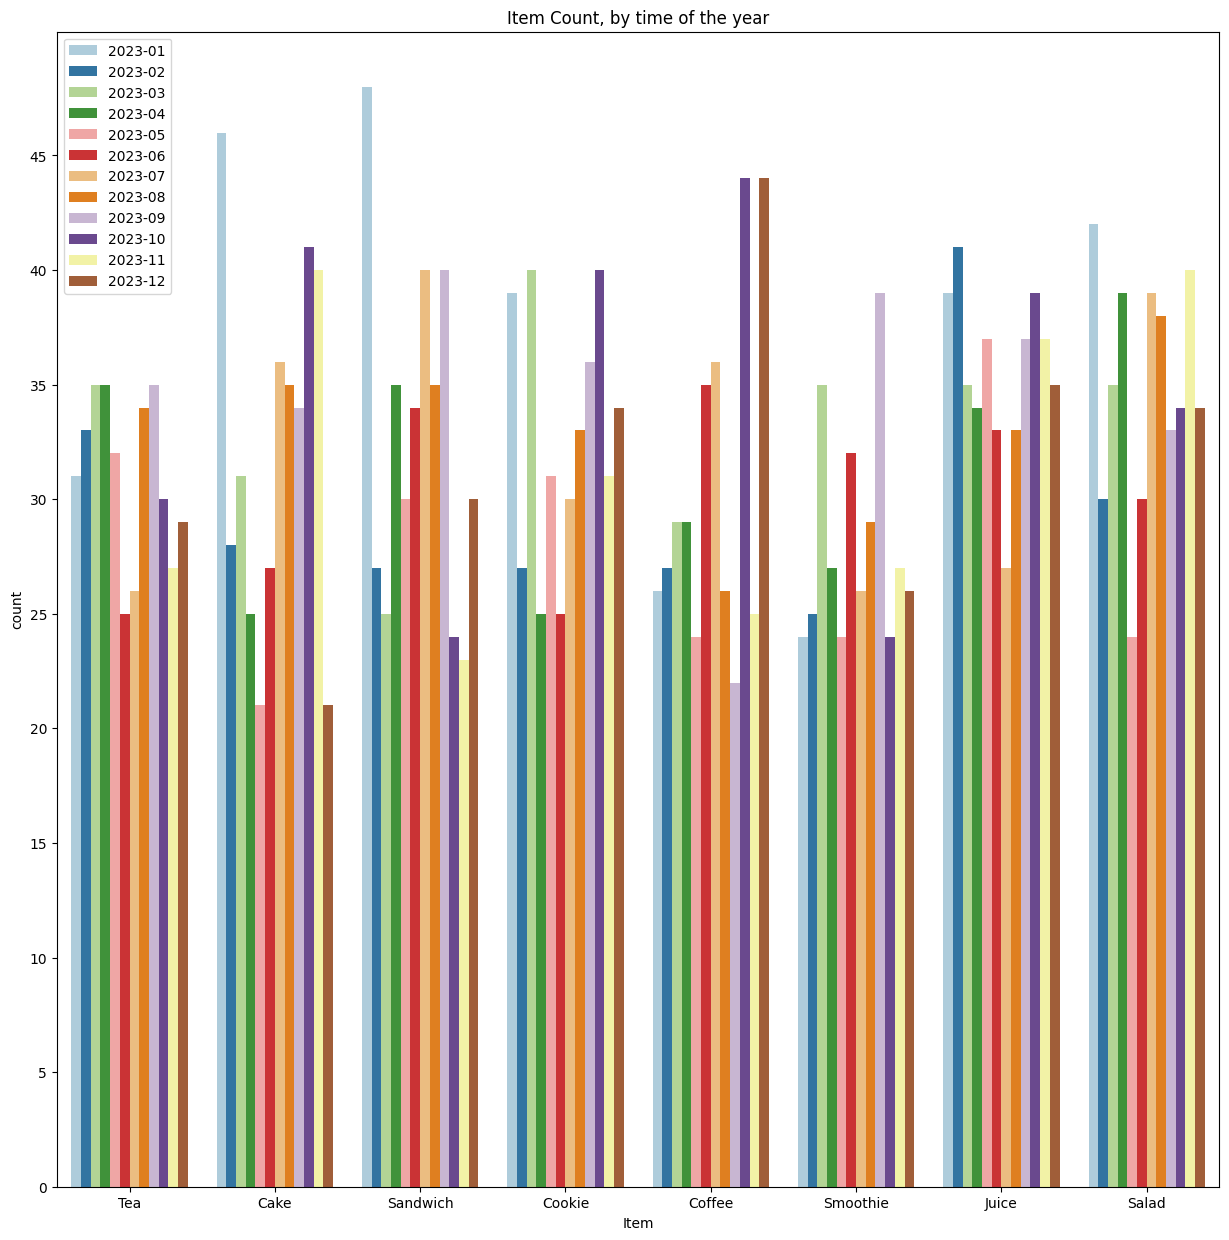

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.countplot(x= df['Item'], palette = 'Paired', hue = df['Transaction Date'])
plt.legend(loc='upper left')
plt.title('Item Count, by time of the year')
plt.yticks(range(0,50,5))


([<matplotlib.axis.YTick at 0x7da82890a190>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25'),
  Text(0, 30, '30'),
  Text(0, 35, '35'),
  Text(0, 40, '40'),
  Text(0, 45, '45'),
  Text(0, 50, '50'),
  Text(0, 55, '55'),
  Text(0, 60, '60'),
  Text(0, 65, '65'),
  Text(0, 70, '70'),
  Text(0, 75, '75'),
  Text(0, 80, '80'),
  Text(0, 85, '85'),
  Text(0, 90, '90'),
  Text(0, 95, '95'),
  Text(0, 100, '100'),
  Text(0, 105, '105'),
  Text(0, 110, '110'),
  Text(0, 115, '115'),
  Text(0, 120, '120'),
  Text(0, 125, '125'),
  Text(0, 130, '130'),
  Text(0, 135, '135'),
  Text(0, 140, '140'),
  Text(0, 145, '145'),
  Text(0, 150, '150'),
  Text(0, 155, '155'),
  Text(0, 160, '160'),
  Text(0, 165, '165'),
  Text(0, 170, '170'),
  Text(0, 175, '175'),
  Text(0, 180, '180'),
  Text(0, 185, '185'),
  Text(0, 190, '190'),
  Text(0, 195, '195'),
  Text(0, 200, '200'),
  Text(0, 205, '205'),
  Text(0, 210, '210'),
  Text(0, 

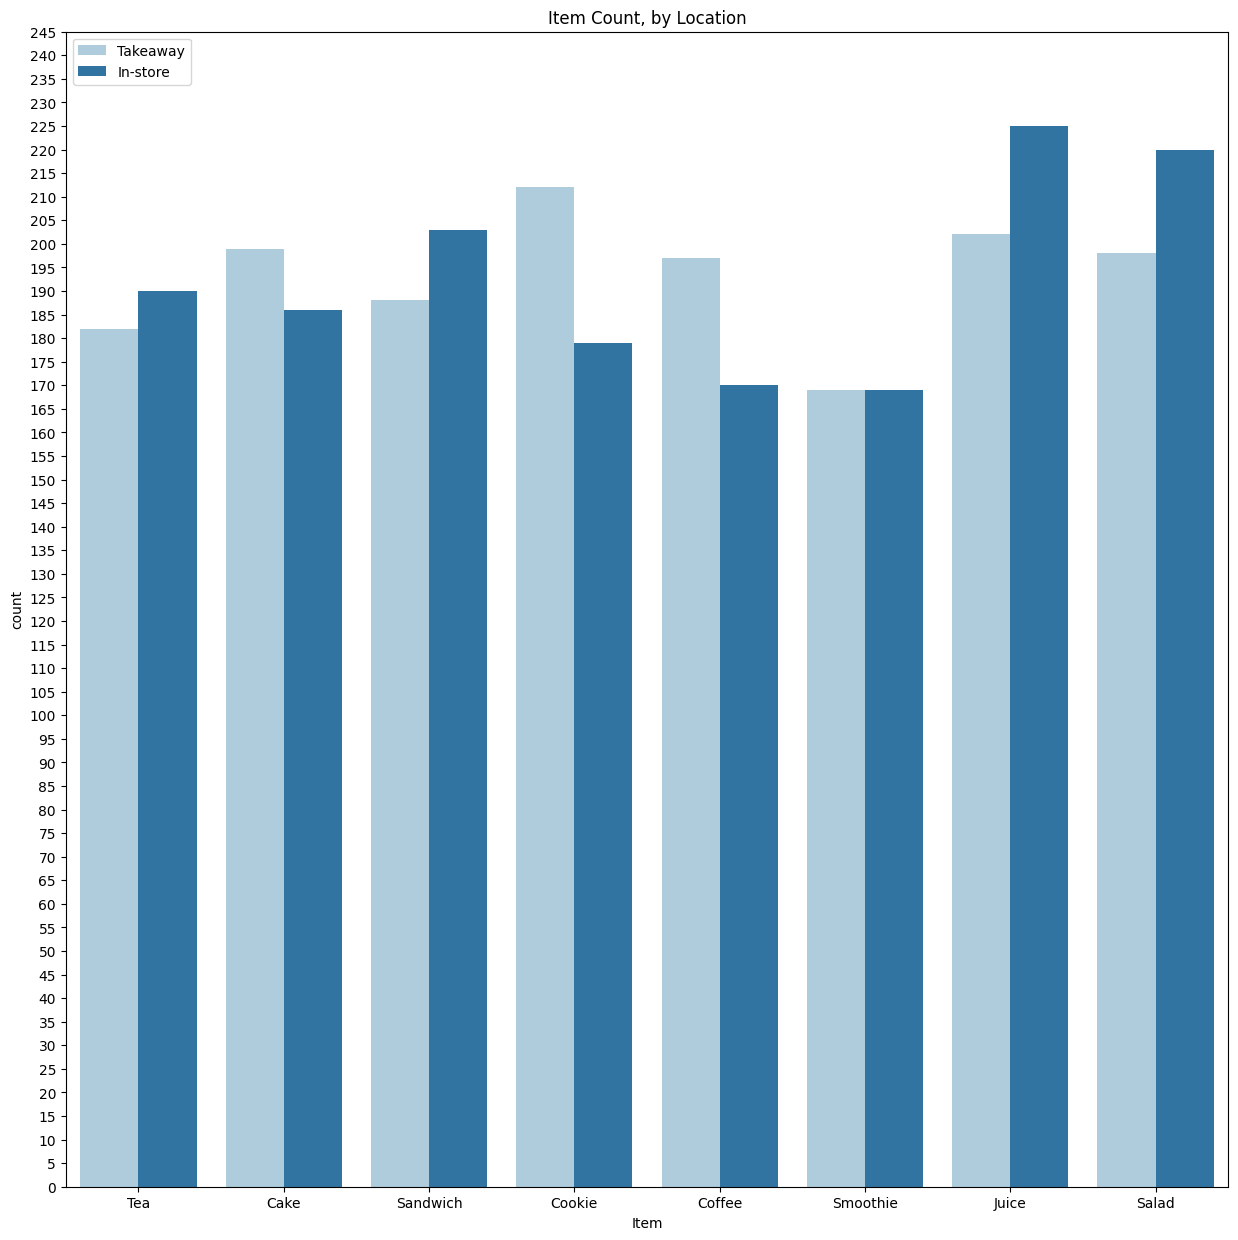

In [118]:
plt.figure(figsize=(15,15))
sns.countplot(x= df['Item'], palette = 'Paired', hue = df['Location'])
plt.legend(loc='upper left')
plt.title('Item Count, by Location')
plt.yticks(range(0,250,5))

<Axes: xlabel='Quantity', ylabel='Total Spent'>

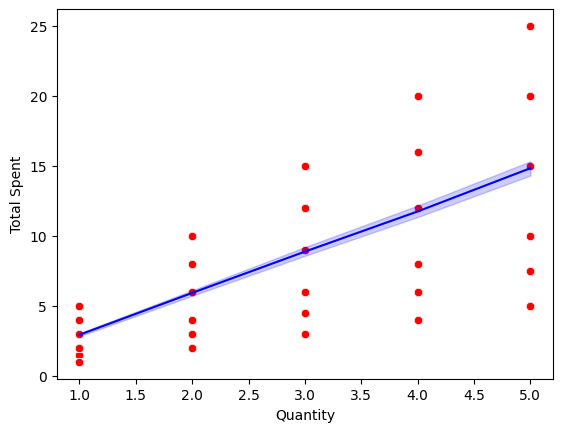

In [127]:
sns.scatterplot(x=df['Quantity'], y=df['Total Spent'], color = 'red')
sns.lineplot(x=df['Quantity'], y=df['Total Spent'], color = 'blue')